In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv(
    "/home/shrishjay/projects/Crop-Yeild-Prediction/data/crop_production.csv"
)
df

,State_Name,Crop_Type,Crop,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons,Yield_ton_per_hec
0,andhra pradesh,kharif,cotton,120,40,20,5.46,654.34,29.266667,7300.0,9400.0,1.287671
1,andhra pradesh,kharif,horsegram,20,60,20,6.18,654.34,29.266667,3300.0,1000.0,0.303030
2,andhra pradesh,kharif,jowar,80,40,40,5.42,654.34,29.266667,10100.0,10200.0,1.009901
3,andhra pradesh,kharif,maize,80,40,20,5.62,654.34,29.266667,2800.0,4900.0,1.750000
4,andhra pradesh,kharif,moong,20,40,20,5.68,654.34,29.266667,1300.0,500.0,0.384615
...,...,...,...,...,...,...,...,...,...,...,...,...
99844,west bengal,rabi,wheat,60,30,30,6.70,152.54,22.280000,2013.0,5152.0,2.559364
99845,west bengal,summer,maize,80,40,20,5.68,182.50,29.200000,258.0,391.0,1.515504
99846,west bengal,summer,rice,80,40,40,5.64,182.50,29.200000,105.0,281.0,2.676190
99847,west bengal,rabi,rice,80,40,40,5.42,152.54,22.280000,152676.0,261435.0,1.712352


In [4]:
df['Crop'].unique()

array(['cotton', 'horsegram', 'jowar', 'maize', 'moong', 'ragi', 'rice',
       'sunflower', 'wheat', 'sesamum', 'soyabean', 'rapeseed', 'jute',
       'arecanut', 'onion', 'potato', 'sweetpotato', 'tapioca',
       'turmeric', 'barley', 'banana', 'coriander', 'garlic',
       'blackpepper', 'cardamom', 'cashewnuts', 'blackgram', 'coffee',
       'ladyfinger', 'brinjal', 'cucumber', 'grapes', 'mango', 'orange',
       'papaya', 'tomato', 'cabbage', 'bottlegourd', 'pineapple',
       'carrot', 'radish', 'bittergourd', 'drumstick', 'jackfruit',
       'cauliflower', 'watermelon', 'ashgourd', 'beetroot', 'pomegranate',
       'ridgegourd', 'pumpkin', 'apple', 'ginger'], dtype=object)

In [5]:
# Calculate std dev per crop
crop_std = df.groupby('Crop')['Yield_ton_per_hec'].std()

# Find crops with std = 0
zero_std_crops = crop_std[crop_std == 0].index.tolist()

# Remove these crops
df_clean = df[~df['Crop'].isin(zero_std_crops)].copy()

In [6]:

grouped = df.groupby("Crop")["rainfall"]

stats = grouped.describe()
print(stats)

               count         mean         std          min        25%  \
Crop                                                                    
apple            3.0   884.500000    0.000000   884.500000   884.5000   
arecanut      1154.0  1782.177028  695.229200    56.236000  1501.9800   
ashgourd        28.0   884.500000    0.000000   884.500000   884.5000   
banana        2409.0  1299.647262  695.623015     5.274000   884.5000   
barley        3139.0   102.947384  149.236740    19.380000    73.4700   
beetroot        14.0   884.500000    0.000000   884.500000   884.5000   
bittergourd     67.0  1683.396045  920.640095   884.500000   884.5000   
blackgram       58.0   508.648621  358.646676   127.680000   127.6800   
blackpepper    571.0  2016.620728  780.945340    56.236000  1603.2375   
bottlegourd     58.0  1034.166724  157.053197   884.500000   942.8000   
brinjal        282.0  1296.918273  530.184831   550.124500   942.8000   
cabbage        125.0  1084.887920  136.622599   884

In [7]:

grouped = df_clean.groupby("Crop")["Yield_ton_per_hec"]

stats = grouped.describe()
print(stats)

               count       mean         std       min        25%        50%  \
Crop                                                                          
arecanut      1154.0   1.846207    2.116132  0.156250   0.777487   1.162037   
banana        2409.0  26.207587   18.535249  0.000000  12.837838  19.966527   
barley        3139.0   1.746630    0.843489  0.000000   1.096998   1.638431   
bittergourd     67.0   0.595745    1.784285  0.000000   0.000000   0.000000   
blackgram       58.0   0.681632    0.125705  0.399062   0.580826   0.699335   
blackpepper    571.0   1.009993    1.080941  0.002439   0.192840   0.362573   
bottlegourd     58.0   1.207976    2.882102  0.000000   0.000000   0.000000   
brinjal        282.0   5.576893    5.792903  0.000000   0.000000   4.985294   
cabbage        125.0   9.937189   20.551075  0.000000   0.000000   0.000000   
cardamom       237.0   0.143598    0.295870  0.001942   0.062337   0.084507   
carrot          28.0   4.764793    3.833601  0.00000

In [8]:

grouped = df_clean.groupby("Crop")["Yield_ton_per_hec"]

stats = grouped.describe()
print(stats)

               count       mean         std       min        25%        50%  \
Crop                                                                          
arecanut      1154.0   1.846207    2.116132  0.156250   0.777487   1.162037   
banana        2409.0  26.207587   18.535249  0.000000  12.837838  19.966527   
barley        3139.0   1.746630    0.843489  0.000000   1.096998   1.638431   
bittergourd     67.0   0.595745    1.784285  0.000000   0.000000   0.000000   
blackgram       58.0   0.681632    0.125705  0.399062   0.580826   0.699335   
blackpepper    571.0   1.009993    1.080941  0.002439   0.192840   0.362573   
bottlegourd     58.0   1.207976    2.882102  0.000000   0.000000   0.000000   
brinjal        282.0   5.576893    5.792903  0.000000   0.000000   4.985294   
cabbage        125.0   9.937189   20.551075  0.000000   0.000000   0.000000   
cardamom       237.0   0.143598    0.295870  0.001942   0.062337   0.084507   
carrot          28.0   4.764793    3.833601  0.00000

<Axes: xlabel='Yield_ton_per_hec'>

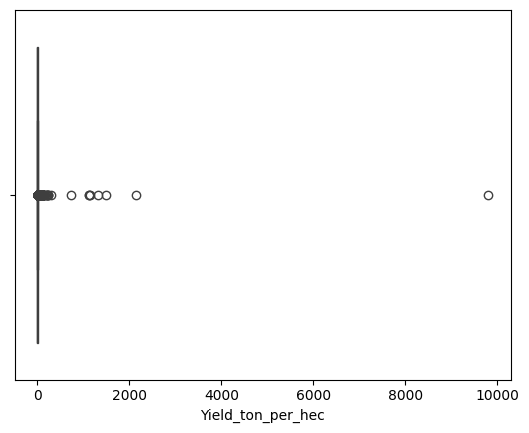

In [9]:
import seaborn as sns
sns.boxplot(x=df['Yield_ton_per_hec'])

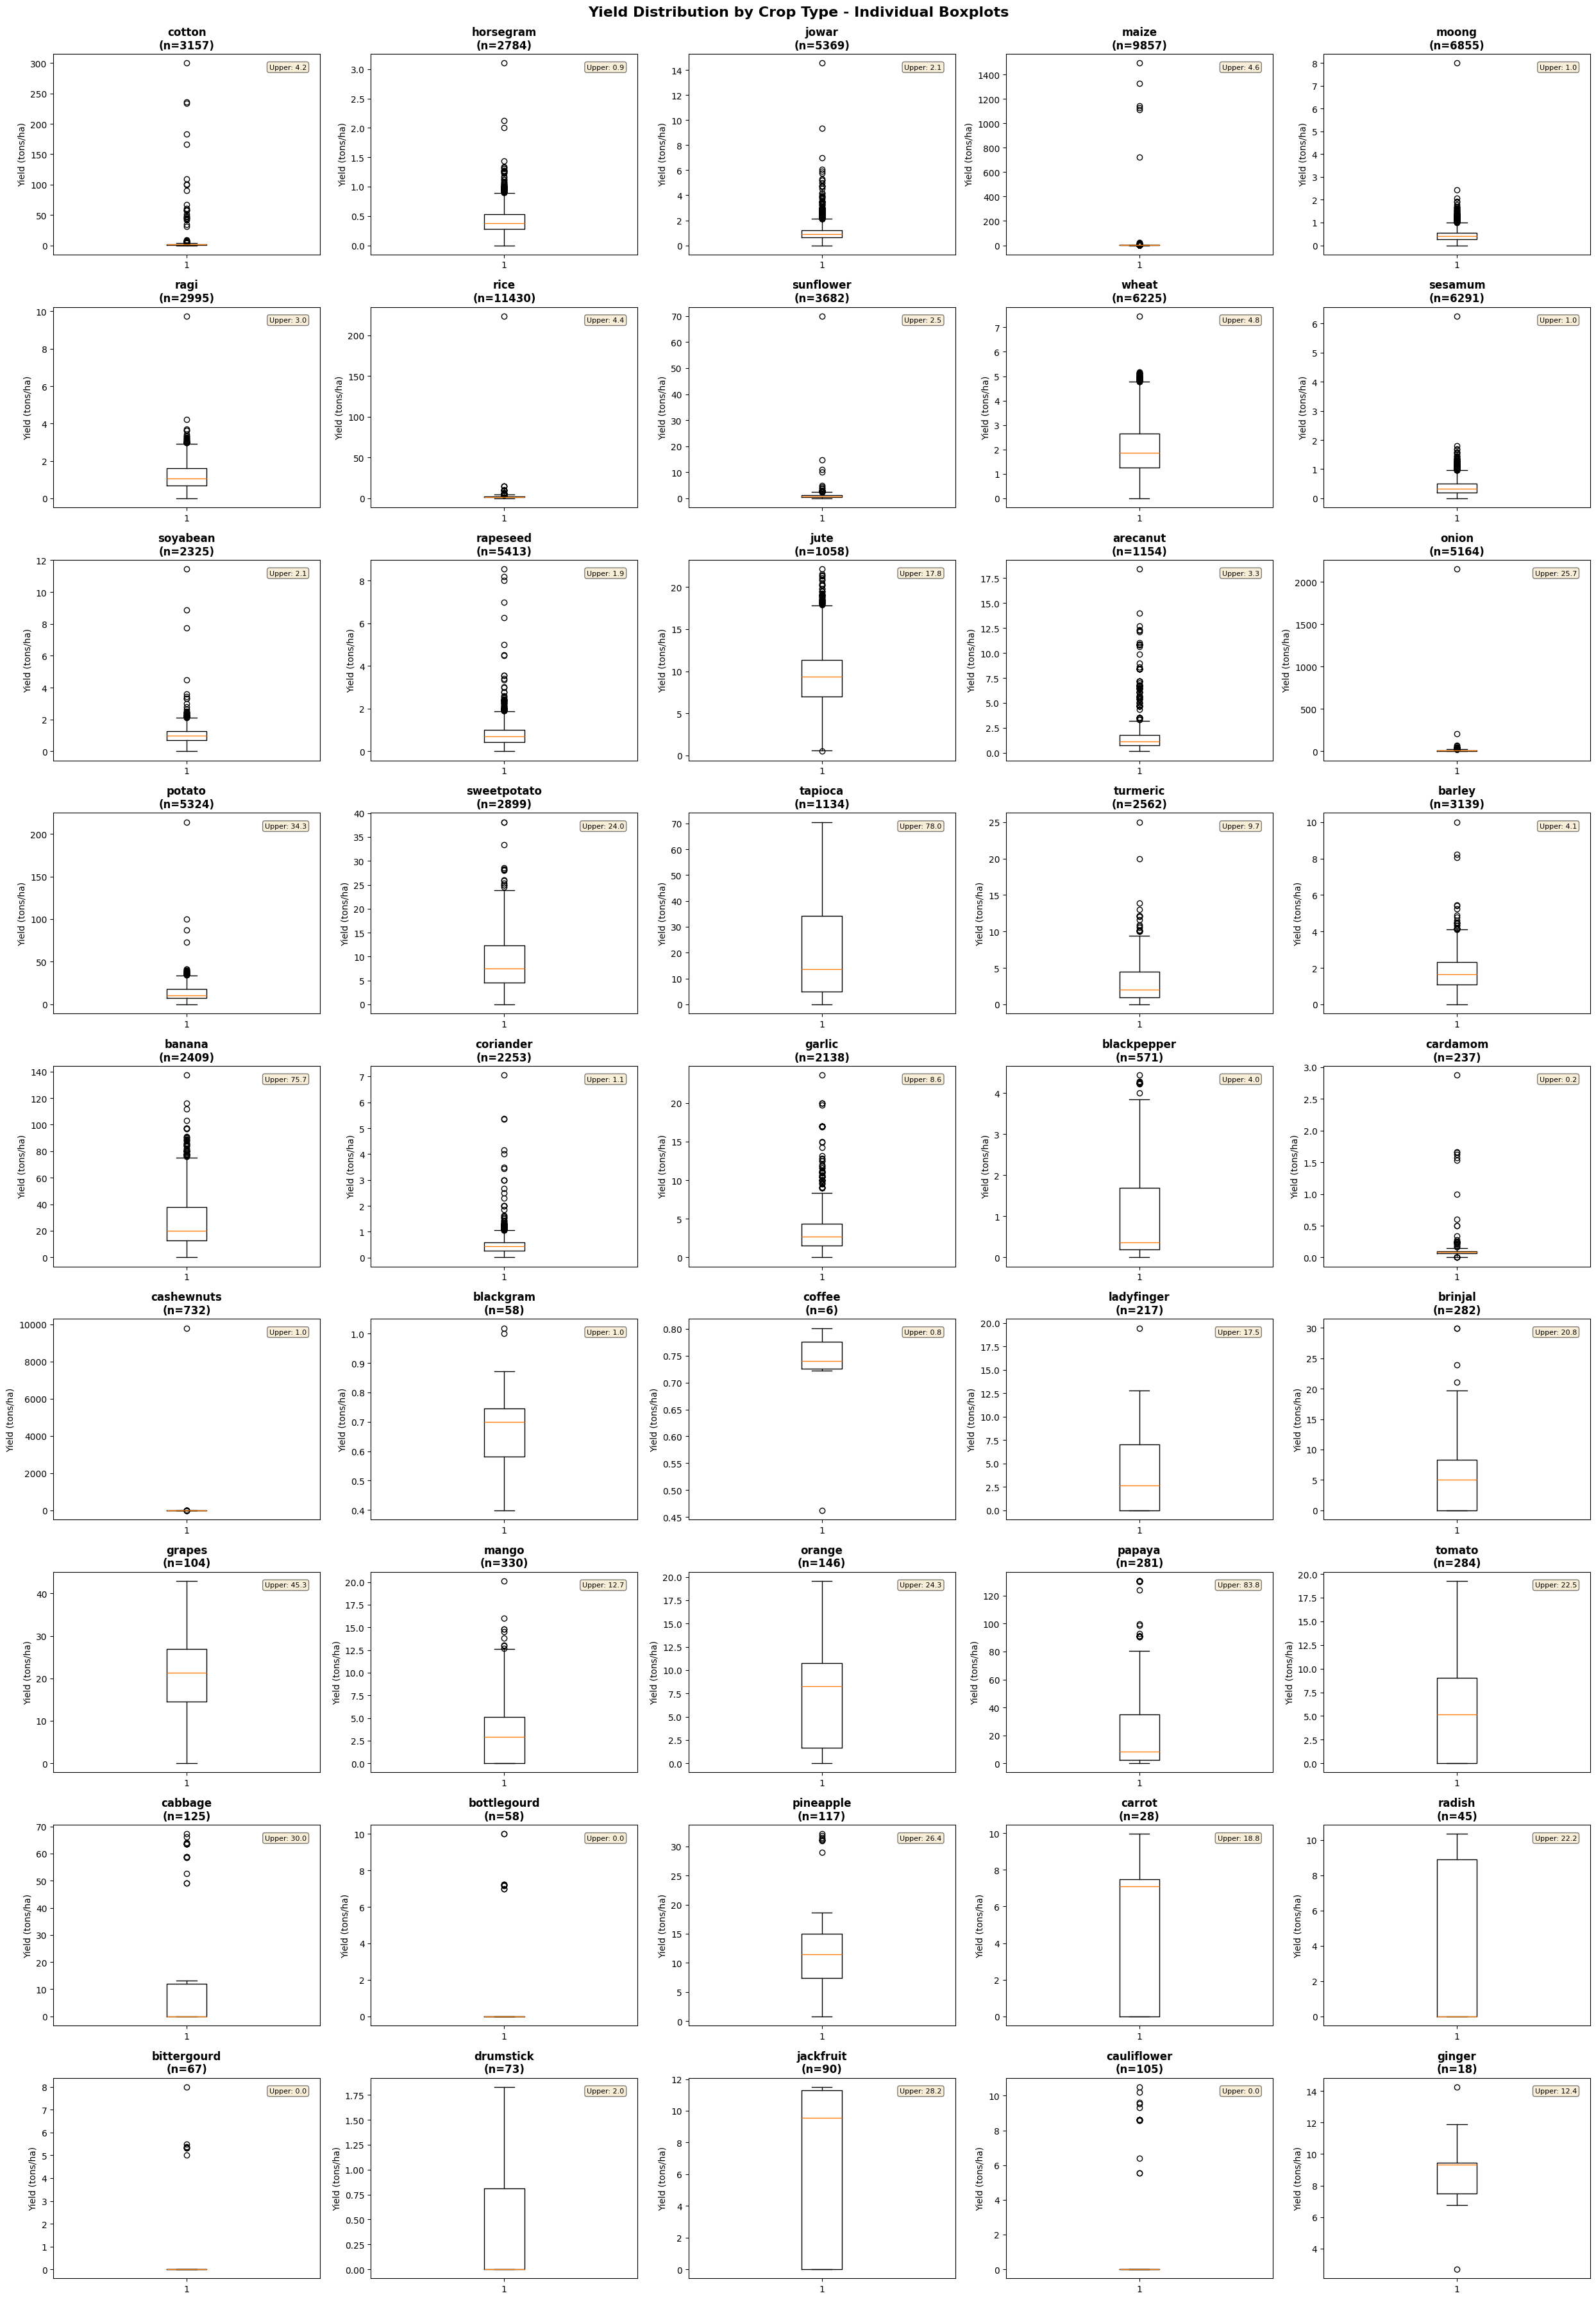

✓ Created boxplots for 45 crops


In [10]:

# Get list of all crops
crops = df_clean['Crop'].unique()

# Calculate grid size
n_crops = len(crops)
n_cols = 5  # 5 plots per row
n_rows = int(np.ceil(n_crops / n_cols))

# Create large figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(25, n_rows * 4))
axes = axes.flatten()  # Flatten to 1D array for easy iteration

# Plot each crop
for idx, crop in enumerate(crops):
    # Get data for this crop
    crop_data = df[df['Crop'] == crop]['Yield_ton_per_hec']
    
    # Create boxplot
    axes[idx].boxplot(crop_data)
    
    # Add title and labels
    axes[idx].set_title(f'{crop}\n(n={len(crop_data)})', fontweight='bold')
    axes[idx].set_ylabel('Yield (tons/ha)')
    
    # Add statistics text
    Q1 = crop_data.quantile(0.25)
    Q3 = crop_data.quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    
    axes[idx].text(0.95, 0.95, f'Upper: {upper_limit:.1f}', 
                   transform=axes[idx].transAxes,
                   ha='right', va='top',
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
                   fontsize=8)

# Hide empty subplots
for idx in range(n_crops, len(axes)):
    axes[idx].axis('off')

# Overall title
fig.suptitle('Yield Distribution by Crop Type - Individual Boxplots', 
             fontsize=16, fontweight='bold', y=0.995)

# Adjust layout
plt.tight_layout()
plt.show()

print(f"✓ Created boxplots for {n_crops} crops")

In [11]:
print("="*70)
print("OUTLIER ANALYSIS - UNDERSTANDING THE PATTERN")
print("="*70)

outlier_summary = []

for crop in df_clean['Crop'].unique():
    crop_data = df_clean[df_clean['Crop'] == crop]['Yield_ton_per_hec']
    
    Q1 = crop_data.quantile(0.25)
    Q3 = crop_data.quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    
    # Count outliers
    outliers = (crop_data < lower_limit) | (crop_data > upper_limit)
    outlier_count = outliers.sum()
    outlier_pct = (outlier_count / len(crop_data)) * 100
    
    # Get outlier values
    outlier_values = crop_data[outliers].values
    
    outlier_summary.append({
        'Crop': crop,
        'Total_Rows': len(crop_data),
        'Outliers': outlier_count,
        'Outlier_Pct': round(outlier_pct, 1),
        'Upper_Limit': round(upper_limit, 2),
        'Max_Value': round(crop_data.max(), 2),
        'Max_Outlier': round(crop_data[outliers].max(), 2) if outlier_count > 0 else 0,
        'Skewness': round(crop_data.skew(), 2)
    })

# Convert to DataFrame
outlier_df = pd.DataFrame(outlier_summary)
outlier_df = outlier_df.sort_values('Outlier_Pct', ascending=False)

# Display crops with high outlier percentage
print("\nCrops with >20% outliers:")
print(outlier_df[outlier_df['Outlier_Pct'] > 20].to_string(index=False))

print("\nCrops with 10-20% outliers:")
print(outlier_df[(outlier_df['Outlier_Pct'] >= 10) & 
                 (outlier_df['Outlier_Pct'] <= 20)].to_string(index=False))

print("\nCrops with <10% outliers:")
print(f"{len(outlier_df[outlier_df['Outlier_Pct'] < 10])} crops")

OUTLIER ANALYSIS - UNDERSTANDING THE PATTERN

Crops with >20% outliers:
Empty DataFrame
Columns: [Crop, Total_Rows, Outliers, Outlier_Pct, Upper_Limit, Max_Value, Max_Outlier, Skewness]
Index: []

Crops with 10-20% outliers:
       Crop  Total_Rows  Outliers  Outlier_Pct  Upper_Limit  Max_Value  Max_Outlier  Skewness
cauliflower         105        18         17.1         0.00      10.50        10.50      1.87
     coffee           6         1         16.7         0.85       0.80         0.46     -2.12
bottlegourd          58         9         15.5         0.00      10.00        10.00      2.08
   cardamom         237        34         14.3         0.16       2.87         2.87      6.08
    cabbage         125        17         13.6        30.00      67.21        67.21      2.02
     papaya         281        35         12.5        83.80     130.50       130.50      1.74
   arecanut        1154       134         11.6         3.29      18.40        18.40      2.99
     ginger          18

In [12]:
# Check if these crops have lots of zeros
problem_crops = ['cauliflower', 'bottlegourd', 'bittergourd']

for crop in problem_crops:
    crop_data = df_clean[df_clean['Crop'] == crop]['Yield_ton_per_hec']
    zero_count = (crop_data == 0).sum()
    zero_pct = (zero_count / len(crop_data)) * 100
    
    print(f"{crop}:")
    print(f"  Total: {len(crop_data)}")
    print(f"  Zeros: {zero_count} ({zero_pct:.1f}%)")
    print(f"  Min: {crop_data.min():.2f}")
    print(f"  Q1: {crop_data.quantile(0.25):.2f}")
    print(f"  Q2: {crop_data.quantile(0.50):.2f}")
    print(f"  Q3: {crop_data.quantile(0.75):.2f}")
    print(f"  Max: {crop_data.max():.2f}")
    print()

cauliflower:
  Total: 105
  Zeros: 87 (82.9%)
  Min: 0.00
  Q1: 0.00
  Q2: 0.00
  Q3: 0.00
  Max: 10.50

bottlegourd:
  Total: 58
  Zeros: 49 (84.5%)
  Min: 0.00
  Q1: 0.00
  Q2: 0.00
  Q3: 0.00
  Max: 10.00

bittergourd:
  Total: 67
  Zeros: 60 (89.6%)
  Min: 0.00
  Q1: 0.00
  Q2: 0.00
  Q3: 0.00
  Max: 8.00



In [13]:
df_clean['Crop'].value_counts()

Crop
rice           11430
maize           9857
moong           6855
sesamum         6291
wheat           6225
rapeseed        5413
jowar           5369
potato          5324
onion           5164
sunflower       3682
cotton          3157
barley          3139
ragi            2995
sweetpotato     2899
horsegram       2784
turmeric        2562
banana          2409
soyabean        2325
coriander       2253
garlic          2138
arecanut        1154
tapioca         1134
jute            1058
cashewnuts       732
blackpepper      571
mango            330
tomato           284
brinjal          282
papaya           281
cardamom         237
ladyfinger       217
orange           146
cabbage          125
pineapple        117
cauliflower      105
grapes           104
jackfruit         90
drumstick         73
bittergourd       67
bottlegourd       58
blackgram         58
radish            45
carrot            28
ginger            18
coffee             6
Name: count, dtype: int64

In [14]:

original_count = len(df_clean)
original_crops = df_clean['Crop'].nunique()

# Step 1: Remove crops with >80% zeros
print("\n[STEP 1] Removing crops with excessive zeros...")

zero_crops = ['cauliflower', 'bottlegourd', 'bittergourd']
df_clean = df_clean[~df_clean['Crop'].str.lower().isin(zero_crops)]

print(f"  Removed: {zero_crops}")
print(f"  Rows removed: {original_count - len(df_clean)}")

# Step 2: Remove crops with too few samples
print("\n[STEP 2] Removing crops with insufficient data...")

min_samples = 100  # Need at least 20 samples to learn patterns
small_crops = df_clean['Crop'].value_counts()[df_clean['Crop'].value_counts() < min_samples].index.tolist()

if small_crops:
    print(f"  Crops with < {min_samples} samples:")
    for crop in small_crops:
        count = len(df_clean[df_clean['Crop'] == crop])
        print(f"    - {crop}: {count} rows")
    
    df_clean = df_clean[~df_clean['Crop'].isin(small_crops)]
    print(f"  Removed {len(small_crops)} crops")
else:
    print(f"  All crops have >= {min_samples} samples ✓")

# Step 3: Remove any remaining zeros
print("\n[STEP 3] Removing zero yields...")

zeros_count = (df_clean['Yield_ton_per_hec'] == 0).sum()
if zeros_count > 0:
    print(f"  Found {zeros_count} zero values")
    df_clean = df_clean[df_clean['Yield_ton_per_hec'] > 0]
    print(f"  Removed {zeros_count} rows with zero yield")
else:
    print(f"  No zero values found ✓")


[STEP 1] Removing crops with excessive zeros...
  Removed: ['cauliflower', 'bottlegourd', 'bittergourd']
  Rows removed: 230

[STEP 2] Removing crops with insufficient data...
  Crops with < 100 samples:
    - jackfruit: 90 rows
    - drumstick: 73 rows
    - blackgram: 58 rows
    - radish: 45 rows
    - carrot: 28 rows
    - ginger: 18 rows
    - coffee: 6 rows
  Removed 7 crops

[STEP 3] Removing zero yields...
  Found 876 zero values
  Removed 876 rows with zero yield


In [15]:
import pandas as pd
import numpy as np

print("="*70)
print("REMOVING OUTLIERS PER CROP USING BOXPLOT (IQR METHOD)")
print("="*70)

# Store original counts
original_count = len(df_clean)
original_crops = df_clean['Crop'].nunique()

print(f"\nOriginal data: {original_count:,} rows from {original_crops} crops")

# Dictionary to track removal per crop
removal_summary = []

# Process each crop individually
for crop in df_clean['Crop'].unique():
    # Get data for this crop
    crop_mask = df_clean['Crop'] == crop
    crop_data = df_clean[crop_mask]['Yield_ton_per_hec']
    
    # Calculate IQR boundaries
    Q1 = crop_data.quantile(0.25)
    Q3 = crop_data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Calculate boxplot limits
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = crop_mask & (
        (df_clean['Yield_ton_per_hec'] < lower_limit) | 
        (df_clean['Yield_ton_per_hec'] > upper_limit)
    )
    
    outlier_count = outliers.sum()
    
    # Store summary
    if outlier_count > 0:
        outlier_values = df_clean.loc[outliers, 'Yield_ton_per_hec'].values
        removal_summary.append({
            'Crop': crop,
            'Total_Rows': len(crop_data),
            'Outliers_Removed': outlier_count,
            'Outlier_Pct': round(outlier_count / len(crop_data) * 100, 1),
            'Q1': round(Q1, 2),
            'Q3': round(Q3, 2),
            'IQR': round(IQR, 2),
            'Upper_Limit': round(upper_limit, 2),
            'Max_Value': round(crop_data.max(), 2),
            'Max_Outlier': round(outlier_values.max(), 2) if outlier_count > 0 else 0
        })
        
        # Remove outliers
        df_clean = df_clean[~outliers]

# Create summary DataFrame
summary_df = pd.DataFrame(removal_summary).sort_values('Outliers_Removed', ascending=False)

# Display results
print("\n" + "="*70)
print("OUTLIER REMOVAL SUMMARY BY CROP")
print("="*70)

print(f"\nCrops with outliers removed:")
print(summary_df.to_string(index=False))

# Calculate totals
total_removed = summary_df['Outliers_Removed'].sum()
final_count = len(df_clean)
final_crops = df_clean['Crop'].nunique()

print("\n" + "="*70)
print("OVERALL SUMMARY")
print("="*70)

print(f"\nOriginal:     {original_count:,} rows from {original_crops} crops")
print(f"Removed:      {total_removed:,} rows ({total_removed/original_count*100:.2f}%)")
print(f"Remaining:    {final_count:,} rows from {final_crops} crops")
print(f"Retention:    {final_count/original_count*100:.2f}%")

# Check distribution improvement
print("\n" + "="*70)
print("DISTRIBUTION QUALITY CHECK")
print("="*70)

print(f"\nYield statistics after outlier removal:")
print(df_clean['Yield_ton_per_hec'].describe())

print(f"\nDistribution metrics:")
print(f"  Skewness: {df_clean['Yield_ton_per_hec'].skew():.2f} (target: < 5)")
print(f"  Kurtosis: {df_clean['Yield_ton_per_hec'].kurtosis():.2f} (target: < 10)")

# Quality assessment
if df_clean['Yield_ton_per_hec'].skew() < 5:
    print("  ✓ Skewness is GOOD")
else:
    print("  ⚠ Skewness is still high")

if df_clean['Yield_ton_per_hec'].kurtosis() < 10:
    print("  ✓ Kurtosis is GOOD")
else:
    print("  ⚠ Kurtosis is still high")


REMOVING OUTLIERS PER CROP USING BOXPLOT (IQR METHOD)

Original data: 98,167 rows from 35 crops

OUTLIER REMOVAL SUMMARY BY CROP

Crops with outliers removed:
       Crop  Total_Rows  Outliers_Removed  Outlier_Pct    Q1    Q3   IQR  Upper_Limit  Max_Value  Max_Outlier
      maize        9806               438          4.5  1.18  2.55  1.36         4.59    1494.00      1494.00
      onion        5160               230          4.5  6.17 14.00  7.83        25.74    2150.00      2150.00
      jowar        5344               226          4.2  0.64  1.23  0.59         2.11      14.57        14.57
    sesamum        6232               151          2.4  0.19  0.50  0.31         0.96       6.25         6.25
  coriander        2253               145          6.4  0.27  0.58  0.32         1.06       7.06         7.06
   arecanut        1154               134         11.6  0.78  1.78  1.01         3.29      18.40        18.40
       rice       11427               132          1.2  1.20  2.47  1.2

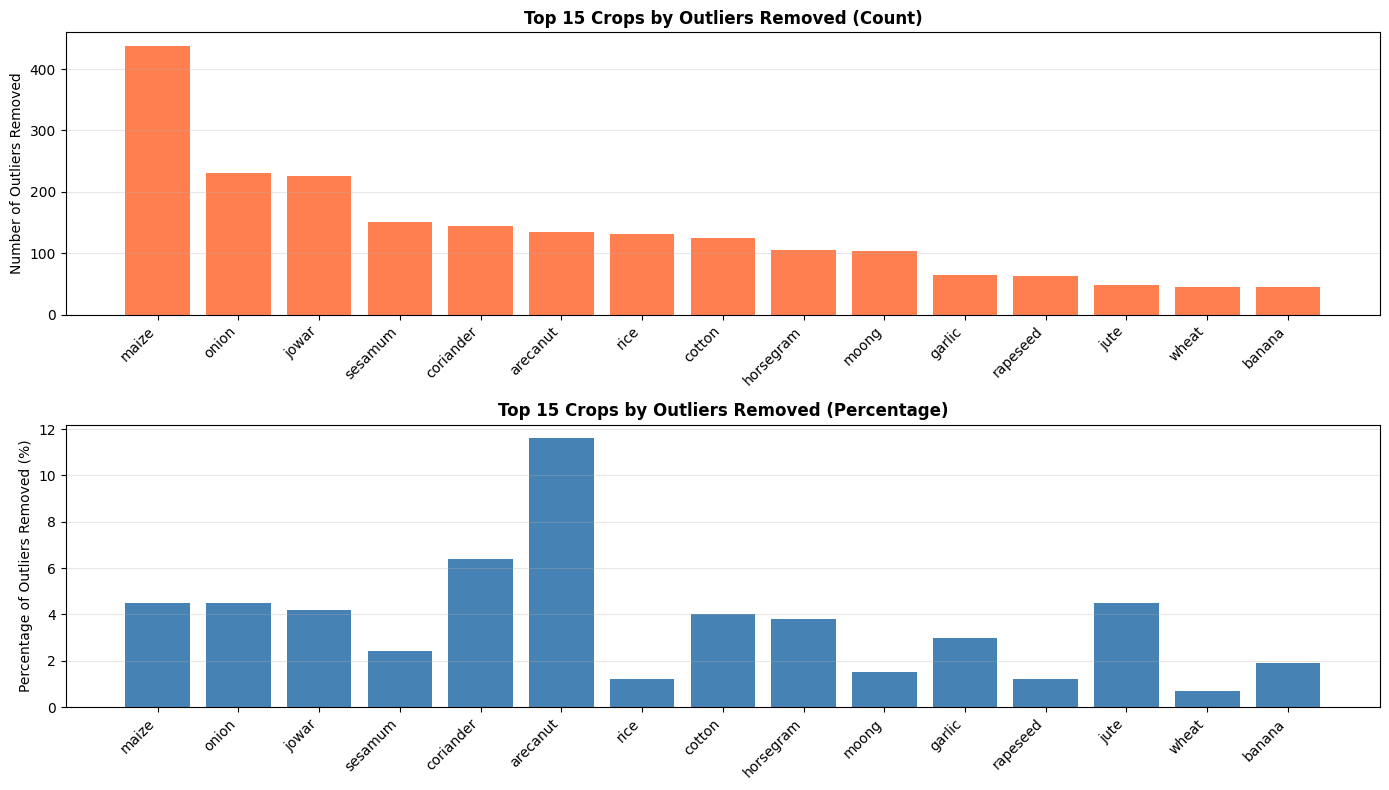

In [16]:
# Visualize crops with most outliers removed
if len(summary_df) > 0:
    plt.figure(figsize=(14, 8))
    
    # Sort by outliers removed
    top_crops = summary_df.head(15)
    
    # Create bar plot
    plt.subplot(2, 1, 1)
    plt.bar(range(len(top_crops)), top_crops['Outliers_Removed'], color='coral')
    plt.xticks(range(len(top_crops)), top_crops['Crop'], rotation=45, ha='right')
    plt.ylabel('Number of Outliers Removed')
    plt.title('Top 15 Crops by Outliers Removed (Count)', fontweight='bold')
    plt.grid(axis='y', alpha=0.3)
    
    # Create percentage plot
    plt.subplot(2, 1, 2)
    plt.bar(range(len(top_crops)), top_crops['Outlier_Pct'], color='steelblue')
    plt.xticks(range(len(top_crops)), top_crops['Crop'], rotation=45, ha='right')
    plt.ylabel('Percentage of Outliers Removed (%)')
    plt.title('Top 15 Crops by Outliers Removed (Percentage)', fontweight='bold')
    plt.grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    


<Axes: xlabel='rainfall'>

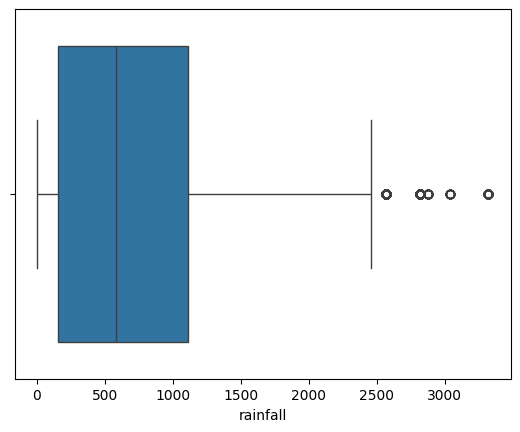

In [17]:
sns.boxplot(x=df_clean['rainfall'])

In [18]:
df_clean['Yield_ton_per_hec'].skew()

np.float64(4.441268436916622)

In [19]:
percentile25=df_clean['Yield_ton_per_hec'].quantile(0.25)
percentile75=df_clean['Yield_ton_per_hec'].quantile(0.75)
print(percentile25)
percentile75

0.5981652488471935


np.float64(2.89789432492521)

In [20]:
iqr=percentile75-percentile25
upper_limit=percentile75+1.5*iqr
lower_limit=percentile25-1.5*iqr
print(upper_limit)
print(lower_limit)

6.347487939042235
-2.8514283652698316


In [21]:
df[df['Yield_ton_per_hec']>50]

,State_Name,Crop_Type,Crop,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons,Yield_ton_per_hec
657,bihar,whole year,banana,100,75,50,6.56,1026.6400,29.186364,253.0,16324.00,64.521739
843,bihar,whole year,banana,100,75,50,6.68,1026.6400,29.186364,1376.0,88780.00,64.520349
1248,gujarat,whole year,banana,100,75,50,6.68,810.2600,29.956364,200.0,14300.00,71.500000
1278,gujarat,whole year,banana,100,75,50,6.66,810.2600,29.956364,5100.0,305000.00,59.803922
1288,gujarat,whole year,banana,100,75,50,6.48,810.2600,29.956364,300.0,23300.00,77.666667
...,...,...,...,...,...,...,...,...,...,...,...,...
94630,gujarat,whole year,banana,100,75,50,6.32,810.2600,29.956364,100.0,6200.00,62.000000
95571,karnataka,whole year,banana,100,75,50,6.32,1603.2375,22.890909,1279.0,75163.00,58.767005
95910,kerala,whole year,tapioca,50,50,50,5.38,2817.8600,27.909091,2265.1,118922.98,52.502309
96043,madhya pradesh,whole year,banana,100,75,50,6.66,1111.6800,28.648182,7633.0,416751.00,54.598585


In [22]:
df_clean

,State_Name,Crop_Type,Crop,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons,Yield_ton_per_hec
0,andhra pradesh,kharif,cotton,120,40,20,5.46,654.34,29.266667,7300.0,9400.0,1.287671
1,andhra pradesh,kharif,horsegram,20,60,20,6.18,654.34,29.266667,3300.0,1000.0,0.303030
2,andhra pradesh,kharif,jowar,80,40,40,5.42,654.34,29.266667,10100.0,10200.0,1.009901
3,andhra pradesh,kharif,maize,80,40,20,5.62,654.34,29.266667,2800.0,4900.0,1.750000
4,andhra pradesh,kharif,moong,20,40,20,5.68,654.34,29.266667,1300.0,500.0,0.384615
...,...,...,...,...,...,...,...,...,...,...,...,...
99844,west bengal,rabi,wheat,60,30,30,6.70,152.54,22.280000,2013.0,5152.0,2.559364
99845,west bengal,summer,maize,80,40,20,5.68,182.50,29.200000,258.0,391.0,1.515504
99846,west bengal,summer,rice,80,40,40,5.64,182.50,29.200000,105.0,281.0,2.676190
99847,west bengal,rabi,rice,80,40,40,5.42,152.54,22.280000,152676.0,261435.0,1.712352


In [23]:
#from ydata_profiling import ProfileReport
#report=ProfileReport(df)
#report_clean=ProfileReport(df_clean)
#report_clean.to_file(output_file='report_clean.html')

In [24]:
df_clean

,State_Name,Crop_Type,Crop,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons,Yield_ton_per_hec
0,andhra pradesh,kharif,cotton,120,40,20,5.46,654.34,29.266667,7300.0,9400.0,1.287671
1,andhra pradesh,kharif,horsegram,20,60,20,6.18,654.34,29.266667,3300.0,1000.0,0.303030
2,andhra pradesh,kharif,jowar,80,40,40,5.42,654.34,29.266667,10100.0,10200.0,1.009901
3,andhra pradesh,kharif,maize,80,40,20,5.62,654.34,29.266667,2800.0,4900.0,1.750000
4,andhra pradesh,kharif,moong,20,40,20,5.68,654.34,29.266667,1300.0,500.0,0.384615
...,...,...,...,...,...,...,...,...,...,...,...,...
99844,west bengal,rabi,wheat,60,30,30,6.70,152.54,22.280000,2013.0,5152.0,2.559364
99845,west bengal,summer,maize,80,40,20,5.68,182.50,29.200000,258.0,391.0,1.515504
99846,west bengal,summer,rice,80,40,40,5.64,182.50,29.200000,105.0,281.0,2.676190
99847,west bengal,rabi,rice,80,40,40,5.42,152.54,22.280000,152676.0,261435.0,1.712352


In [25]:
df_clean = df_clean.copy()

# NPK features
df_clean['npk_sum'] = df_clean['N'] + df_clean['P'] + df_clean['K']
df_clean['n_to_p_ratio'] = df_clean['N'] / (df_clean['P'] + 1)
df_clean['n_to_k_ratio'] = df_clean['N'] / (df_clean['K'] + 1)
df_clean['p_to_k_ratio'] = df_clean['P'] / (df_clean['K'] + 1)
df_clean['n_deficient'] = (df_clean['N'] < 40).astype(int)
df_clean['p_deficient'] = (df_clean['P'] < 20).astype(int)
df_clean['k_deficient'] = (df_clean['K'] < 20).astype(int)

# pH features
df_clean['ph_optimal'] = ((df_clean['pH'] >= 6.0) & (df_clean['pH'] <= 7.5)).astype(int)
df_clean['ph_distance'] = abs(df_clean['pH'] - 6.5)
df_clean['ph_squared'] = df_clean['pH'] ** 2

# Climate features
df_clean['rainfall_temp'] = df_clean['rainfall'] * df_clean['temperature']
df_clean['water_stress'] = df_clean['temperature'] / (df_clean['rainfall'] + 1)
df_clean


,State_Name,Crop_Type,Crop,N,P,K,pH,rainfall,temperature,Area_in_hectares,...,n_to_k_ratio,p_to_k_ratio,n_deficient,p_deficient,k_deficient,ph_optimal,ph_distance,ph_squared,rainfall_temp,water_stress
0,andhra pradesh,kharif,cotton,120,40,20,5.46,654.34,29.266667,7300.0,...,5.714286,1.904762,0,0,0,0,1.04,29.8116,19150.350667,0.044659
1,andhra pradesh,kharif,horsegram,20,60,20,6.18,654.34,29.266667,3300.0,...,0.952381,2.857143,1,0,0,1,0.32,38.1924,19150.350667,0.044659
2,andhra pradesh,kharif,jowar,80,40,40,5.42,654.34,29.266667,10100.0,...,1.951220,0.975610,0,0,0,0,1.08,29.3764,19150.350667,0.044659
3,andhra pradesh,kharif,maize,80,40,20,5.62,654.34,29.266667,2800.0,...,3.809524,1.904762,0,0,0,0,0.88,31.5844,19150.350667,0.044659
4,andhra pradesh,kharif,moong,20,40,20,5.68,654.34,29.266667,1300.0,...,0.952381,1.904762,1,0,0,0,0.82,32.2624,19150.350667,0.044659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99844,west bengal,rabi,wheat,60,30,30,6.70,152.54,22.280000,2013.0,...,1.935484,0.967742,0,0,0,1,0.20,44.8900,3398.591200,0.145109
99845,west bengal,summer,maize,80,40,20,5.68,182.50,29.200000,258.0,...,3.809524,1.904762,0,0,0,0,0.82,32.2624,5329.000000,0.159128
99846,west bengal,summer,rice,80,40,40,5.64,182.50,29.200000,105.0,...,1.951220,0.975610,0,0,0,0,0.86,31.8096,5329.000000,0.159128
99847,west bengal,rabi,rice,80,40,40,5.42,152.54,22.280000,152676.0,...,1.951220,0.975610,0,0,0,0,1.08,29.3764,3398.591200,0.145109


In [26]:
#df_encoded=pd.get_dummies(df_clean,columns=['Crop','Crop_Type','State_Name'],drop_first=False)
#df_encoded

,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons,Yield_ton_per_hec,npk_sum,...,State_Name_puducherry,State_Name_punjab,State_Name_rajasthan,State_Name_sikkim,State_Name_tamil nadu,State_Name_telangana,State_Name_tripura,State_Name_uttar pradesh,State_Name_uttarakhand,State_Name_west bengal
0,120,40,20,5.46,654.34,29.266667,7300.0,9400.0,1.287671,180,...,False,False,False,False,False,False,False,False,False,False
1,20,60,20,6.18,654.34,29.266667,3300.0,1000.0,0.303030,100,...,False,False,False,False,False,False,False,False,False,False
2,80,40,40,5.42,654.34,29.266667,10100.0,10200.0,1.009901,160,...,False,False,False,False,False,False,False,False,False,False
3,80,40,20,5.62,654.34,29.266667,2800.0,4900.0,1.750000,140,...,False,False,False,False,False,False,False,False,False,False
4,20,40,20,5.68,654.34,29.266667,1300.0,500.0,0.384615,80,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99844,60,30,30,6.70,152.54,22.280000,2013.0,5152.0,2.559364,120,...,False,False,False,False,False,False,False,False,False,True
99845,80,40,20,5.68,182.50,29.200000,258.0,391.0,1.515504,140,...,False,False,False,False,False,False,False,False,False,True
99846,80,40,40,5.64,182.50,29.200000,105.0,281.0,2.676190,160,...,False,False,False,False,False,False,False,False,False,True
99847,80,40,40,5.42,152.54,22.280000,152676.0,261435.0,1.712352,160,...,False,False,False,False,False,False,False,False,False,True


In [27]:
encoder=OneHotEncoder(sparse_output=False)
x=df_clean[['Crop','Crop_Type','State_Name']]
encoded_array=encoder.fit_transform(x)
features=encoder.get_feature_names_out(['Crop','Crop_Type','State_Name'])
encoded_df=pd.DataFrame(encoded_array,columns=features,index=df_clean.index)
df_dropped=df_clean.drop(['Crop','Crop_Type','State_Name','Area_in_hectares','Production_in_tons'],axis=1)
df_final=pd.concat([df_dropped,encoded_df],axis=1)
df_final

,N,P,K,pH,rainfall,temperature,Yield_ton_per_hec,npk_sum,n_to_p_ratio,n_to_k_ratio,...,State_Name_puducherry,State_Name_punjab,State_Name_rajasthan,State_Name_sikkim,State_Name_tamil nadu,State_Name_telangana,State_Name_tripura,State_Name_uttar pradesh,State_Name_uttarakhand,State_Name_west bengal
0,120,40,20,5.46,654.34,29.266667,1.287671,180,2.926829,5.714286,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20,60,20,6.18,654.34,29.266667,0.303030,100,0.327869,0.952381,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,80,40,40,5.42,654.34,29.266667,1.009901,160,1.951220,1.951220,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,80,40,20,5.62,654.34,29.266667,1.750000,140,1.951220,3.809524,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,20,40,20,5.68,654.34,29.266667,0.384615,80,0.487805,0.952381,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99844,60,30,30,6.70,152.54,22.280000,2.559364,120,1.935484,1.935484,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
99845,80,40,20,5.68,182.50,29.200000,1.515504,140,1.951220,3.809524,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
99846,80,40,40,5.64,182.50,29.200000,2.676190,160,1.951220,1.951220,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
99847,80,40,40,5.42,152.54,22.280000,1.712352,160,1.951220,1.951220,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [29]:
x=df_final.drop(['Yield_ton_per_hec'],axis=1)
y=df_final['Yield_ton_per_hec']
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [3]:
from preprocessing import *
from feature_engineering import *
from model import *
import pandas as pd
import numpy as np

file_path = "/home/shrishjay/projects/Crop-Yeild-Prediction/data/crop_production.csv"
df = remove_std_0(file_path)
df = mostly_zeros(df)
# df = low_sample(df, 100)
df = rem_0_yeild(df)
df = transform(df)
model = training(df)


0.7812163172648161


In [8]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
y_pred = model.predict(x_test)

# For regression (crop yield prediction)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R² Score: {r2}")

NameError: name 'x_test' is not defined